# Information

`order_datetime` - time of the order

`origin_longitude` - longitude of the order

`origin_latitude` - latitude of the order

`m_order_eta` - time before order arrival

`order_gk` - order number

`order_status_key` - status, an enumeration consisting of the following mapping:

- `4` - cancelled by client,
- `9` - cancelled by system, i.e., a reject

`is_driver_assigned_key` - whether a driver has been assigned

`cancellation_time_in_seconds` - how many seconds passed before cancellation

The data_offers data set is a simple map with 2 columns:

`order_gk` - order number, associated with the same column from the orders data set

`offer_id` - ID of an offer

## Uploading data

In [365]:
from ipywidgets import interact
from skimpy import skim
import pandas as pd
import numpy as np
import os
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [366]:
data_source = os.environ.get("path_data")
df_offers=pd.read_csv(f"{data_source}/raw_data/data_offers.csv")
df_orders=pd.read_csv(f"{data_source}/raw_data/data_orders.csv")

In [367]:
df_offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [368]:
df_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


## Exploratory data analysis

### Summary

In [369]:
df_offers.shape

(334363, 2)

In [370]:
df_orders.shape

(10716, 8)

In [371]:
skim(df_orders)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10716  │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 8      │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃      ┃      ┃            ┃          ┃           ┃            ┃           ┃            ┃        ┃  │
│ ┃ me        ┃ NA   ┃ NA % ┃ mean       ┃ sd       ┃ p0        ┃ p25        ┃ p75       ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ origin_lo │    0 │    0 │      -0.96 │    0.023 │      -1.1 │      -0.97 │     -0.95 │      -0.87 │  ▁▇█▁  │  │
│ │ ngitude   │      │      │            │          │           │            │           │            │        │  │
│ │ origin_la │    0 │    0 │         51 │    0.012 │        51 │         51 │        51 │         51 │  ▁▄█▁  │  │
│ │ titude    │      │      │            │          │           │            │           │            │        │  │
│ │ m_order_e │ 7900 │   74 │        440 │      290 │        60 │        230 │       650 │       1600 │ █▅▃▂▁  │  │
│ │ ta        │      │      │            │          │           │            │           │            │        │  │
│ │ order_gk  │    0 │    0 │ 3000000000 │ 24000000 │ 300000000 │ 3000000000 │ 300000000 │ 3000000000 │ ▃ ▇▅▂█ │  │
│ │           │      │      │        000 │          │      0000 │        000 │      0000 │        000 │        │  │
│ │ order_sta │    0 │    0 │        5.6 │      2.3 │         4 │          4 │         9 │          9 │ █    ▄ │  │
│ │ tus_key   │      │      │            │          │           │            │           │            │        │  │
│ │ is_driver │    0 │    0 │       0.26 │     0.44 │         0 │          0 │         1 │          1 │ █    ▃ │  │
│ │ _assigned │      │      │            │          │           │            │           │            │        │  │
│ │ _k        │      │      │            │          │           │            │           │            │        │  │
│ │ cancellat │ 3400 │   32 │        160 │      210 │         3 │         45 │       190 │       4300 │   █    │  │
│ │ ions_time │      │      │            │          │           │            │           │            │        │  │
│ │ _i        │      │      │            │          │           │            │           │            │        │  │
│ └───────────┴──────┴──────┴────────────┴──────────┴───────────┴────────────┴───────────┴────────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━

In [372]:
df_orders.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,10716.000000,7307.000000
mean,-0.964323,51.450541,441.415423,3.000598e+12,5.590612,0.262598,157.892021
std,0.022818,0.011984,288.006379,2.396261e+07,2.328845,0.440066,213.366963
min,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000
25%,-0.974363,51.444643,233.000000,3.000583e+12,4.000000,0.000000,45.000000
50%,-0.966386,51.451972,368.500000,3.000595e+12,4.000000,0.000000,98.000000
75%,-0.949605,51.456725,653.000000,3.000623e+12,9.000000,1.000000,187.500000
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000


**Comment**: Mean and median similar in all the variables but the `m_order_eta`, where the mean is much higher than the median (skewed to the right). Also the maximum value is much greater than the mean (1559 and 4441 respectively).
With `cancellations_time_in_seconds` we experience something similar: mean is much lower than the maximum value of the variable but much greater than the mean.

This means we probably have some outliers in these two variables (posterior analysis).

If we will need the variable `order_datetime` we will declare it as a timestamp.

In [373]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [374]:
df_orders.isnull().sum()/len(df_orders)

order_datetime                   0.000000
origin_longitude                 0.000000
origin_latitude                  0.000000
m_order_eta                      0.737402
order_gk                         0.000000
order_status_key                 0.000000
is_driver_assigned_key           0.000000
cancellations_time_in_seconds    0.318122
dtype: float64

**Comment**: The amount of null values in the variable `m_order_eta` is higher in proportion than the observations we have for this variable. Also the data is skewed (is there a relationship between these two variables?). Consequently it'd be better to discard this variable, since it could provide some noise to the dataset.
Regarding `cancellations_time_in_seconds`, it has a high proportion of null values but it doesn't seem to be extremely skweded.

In [375]:
df_orders.duplicated().value_counts() #No duplicates

False    10716
dtype: int64

### Variable study


In [376]:
fig = make_subplots(rows=1,cols=2)

fig.add_trace(
    go.Box
    (x=df_orders['m_order_eta'],name="m_order_eta"),row=1,col=1)
fig.add_trace(
    go.Box
    (x=df_orders['cancellations_time_in_seconds'],name="cancellations_time_in_seconds"),row=1,col=2)
fig.update_yaxes(tickangle=-90,row=1,col=1)
fig.update_yaxes(tickangle=-90,row=1,col=2)
fig.update_layout(
    showlegend=False
)

In [377]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers=df[(df<(q1-1.5*IQR))| (df>(q3+1.5*IQR))]
    return outliers

In [378]:
outliers_m_order_eta=find_outliers_IQR(df_orders['m_order_eta'])
(len(outliers_m_order_eta)/len(df_orders['m_order_eta']))*100 
#0.04% of the observations for m_order_eta are considered outliers.

0.04665920119447555

In [379]:
outliers_cancellations=find_outliers_IQR(df_orders['cancellations_time_in_seconds'])
(len(outliers_cancellations)/len(df_orders['cancellations_time_in_seconds']))*100 
#5% of the observations for cancellations are considered outliers.

5.5244494214259054

As there are not many outliers, we could remove them.

In [380]:
def drop_outliers_IQR(df):
    """Returns a dataframe without the outliers"""
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    outliers_dropped = not_outliers.dropna().reset_index()
    return outliers_dropped

In [381]:
drop_outliers_IQR(df_orders)

/var/folders/bs/pzl9llpn4z9d1kxlsk4k87y00000gn/T/ipykernel_1573/2573680848.py:6: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



,index,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
2,13,16:55:28,-0.950683,51.451368,538.0,3000583016613,4,1,188.0
3,14,00:59:26,-0.937006,51.448696,179.0,3000582566041,4,1,316.0
4,21,12:57:52,-0.933755,51.446834,117.0,3000582916315,4,1,41.0
...,...,...,...,...,...,...,...,...,...
2078,10699,16:55:04,-0.971480,51.458364,113.0,3000629956882,4,1,244.0
2079,10703,13:15:55,-0.975372,51.457846,60.0,3000599187005,4,1,28.0
2080,10704,13:12:51,-0.975372,51.457846,60.0,3000599186936,4,1,59.0
2081,10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0


After doing this, we can see we will loose many observations. Consequently, we can cap the outliers.

In [382]:
upper_limit_m_order_eta = df_orders['m_order_eta'].mean()+3*df_orders['m_order_eta'].std()
lower_limit_m_order_eta = df_orders['m_order_eta'].mean()-3*df_orders['m_order_eta'].std()
upper_limit_cancellations = df_orders['cancellations_time_in_seconds'].mean()+3*df_orders['cancellations_time_in_seconds'].std()
lower_limit_cancellations = df_orders['cancellations_time_in_seconds'].mean()-3*df_orders['cancellations_time_in_seconds'].std()

In [383]:
df_order_no_ouliers = df_orders[(df_orders['m_order_eta']>lower_limit_m_order_eta) |(df_orders['m_order_eta']<upper_limit_m_order_eta) | (df_orders['cancellations_time_in_seconds']>lower_limit_cancellations) |(df_orders['cancellations_time_in_seconds']<upper_limit_cancellations)  ]

In [384]:
df_order_no_ouliers

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
9,06:33:52,-0.976216,51.433202,NaN,3000582765616,4,0,78.0
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


Even though it's not ideal, we keep more observations than in the prior method (dropping outliers).

A different option would be to replace the outliers with the mean, for example. This technique usually is applicable in conjunction with null values replacement. However, since both variables have a high proportion of outliers, it shouldn't be ideal.

In [385]:
df_orders['order_status_key'].value_counts(normalize=True)*100

4    68.187757
9    31.812243
Name: order_status_key, dtype: float64

**Comment**: The 68% of the cancellations were performed by the client, while the 32% were cancelled by the system.

In [386]:
df_orders['is_driver_assigned_key'].value_counts(normalize=True)*100

0    73.740202
1    26.259798
Name: is_driver_assigned_key, dtype: float64

**Comment**: Only 26% of the cancelled orders had a driver assigned.

## Visualization

Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

In [387]:
df_orders_failure = df_orders.groupby(['order_status_key','is_driver_assigned_key'],as_index=False).agg(Driver= ("is_driver_assigned_key","count"))
df_orders_failure

,order_status_key,is_driver_assigned_key,Driver
0,4,0,4496
1,4,1,2811
2,9,0,3406
3,9,1,3


In [388]:
df_orders_failure['order_status_key']=df_orders_failure['order_status_key'].replace({4:'Client',9:'System'})

In [389]:
df_orders_failure['%'] = 100 * df_orders_failure['Driver'] / df_orders_failure.groupby('order_status_key')['Driver'].transform('sum')

In [390]:
df_orders_failure

,order_status_key,is_driver_assigned_key,Driver,%
0,Client,0,4496,61.530040
1,Client,1,2811,38.469960
2,System,0,3406,99.911998
3,System,1,3,0.088002


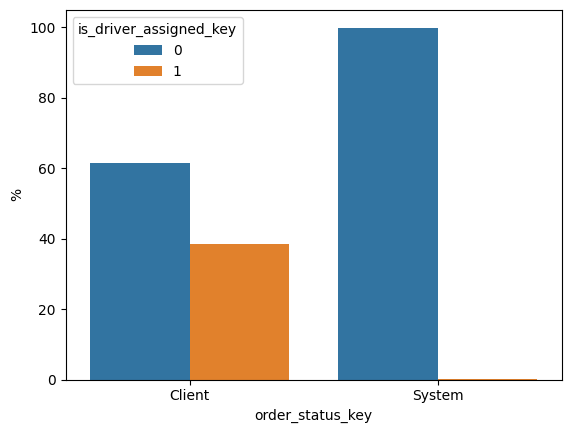

In [391]:
sns.barplot(data=df_orders_failure, x="order_status_key", y="%",
             hue='is_driver_assigned_key');

**Comment**: Less than 1% of the orders cancelled by the system got a driver assigned already. The reason why should be investigated.

For orders cancelled by the clients, the percentages between having a driver already assigned and not having it are more similar. Around 38.5% and 61.5% respectively. 

If a customer cancels an order when the driver is assigned, it could generate a cost to the person delivering the service.


Regardless of who cancelled the order, the proportion of aborted orders where a driver is not assigned is higher. This could lead to think that a higher waiting time could cost an increase of cancelations. 

However, in order to avoid assumptions, this will be studied.



As we have seen that `cancellations_time_in_seconds` has some null values (~30%) I'll drop them.


In [392]:
df_orders_drop_null_cancellation=df_orders[~ df_orders['cancellations_time_in_seconds'].isnull()]
df_orders_drop_null_cancellation

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
9,06:33:52,-0.976216,51.433202,NaN,3000582765616,4,0,78.0
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


In [393]:
px.box (x=df_orders_drop_null_cancellation['cancellations_time_in_seconds'])

In [394]:
len(find_outliers_IQR(df_orders_drop_null_cancellation['cancellations_time_in_seconds']))/len(df_orders_drop_null_cancellation)

0.08101820172437389

After removing null values, the proportion of outliers has increased as expected. Since it's around 8% of the data, rather than dropping them and loosing more observations, I'll cap them.

In [395]:
df_orders_cancellation_no_outliers= df_orders_drop_null_cancellation[(df_orders_drop_null_cancellation['cancellations_time_in_seconds']>lower_limit_cancellations) |(df_orders_drop_null_cancellation['cancellations_time_in_seconds']<upper_limit_cancellations) ]
df_orders_cancellation_no_outliers

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
9,06:33:52,-0.976216,51.433202,NaN,3000582765616,4,0,78.0
...,...,...,...,...,...,...,...,...
10711,13:11:35,-0.975372,51.457846,NaN,3000599186906,4,0,36.0
10712,13:13:55,-0.975372,51.457846,NaN,3000599186962,4,0,4.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0
10714,13:16:28,-0.975372,51.457846,NaN,3000599187024,4,0,6.0


In [396]:
df_orders_cancellation_no_outliers['order_status_key'].value_counts()

4    7307
Name: order_status_key, dtype: int64

When we remove outliers based on the cancellations_time_in seconds, those orders cancelled by the system get removed.

In [398]:
df_orders_cancellation_time = df_orders_cancellation_no_outliers.groupby(["order_status_key","is_driver_assigned_key"],as_index=False).agg(avg_cancellation_time=("cancellations_time_in_seconds","mean"))

In [404]:
fig=px.bar(data_frame=df_orders_cancellation_time,x='is_driver_assigned_key',y="avg_cancellation_time",title="Average cancellation time")
fig.update_xaxes(
    tickvals=[0,1]
)
fig.show()

In [406]:
df_orders_drop_null_eta=df_orders[~ df_orders['m_order_eta'].isnull()]
df_orders_drop_null_eta.describe()

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,2814.000000,2814.000000,2814.000000,2.814000e+03,2814.000000,2814.0,2811.000000
mean,-0.963119,51.450103,441.415423,3.000594e+12,4.005330,1.0,233.897901
std,0.020085,0.011121,288.006379,2.547589e+07,0.163198,0.0,292.709718
min,-1.060767,51.400069,60.000000,3.000550e+12,4.000000,1.0,6.000000
25%,-0.973682,51.444823,233.000000,3.000579e+12,4.000000,1.0,54.000000
50%,-0.966074,51.451804,368.500000,3.000592e+12,4.000000,1.0,127.000000
75%,-0.949824,51.456173,653.000000,3.000623e+12,4.000000,1.0,296.000000
max,-0.876492,51.494748,1559.000000,3.000633e+12,9.000000,1.0,4303.000000


In [407]:
px.box(x=df_orders_drop_null_eta['m_order_eta'])

In [411]:
len(find_outliers_IQR(df_orders_drop_null_eta['m_order_eta']))/len(df_orders_drop_null_eta) #0,1% of outliers, so I'll remove them.

0.0017768301350390902

In [420]:
df_orders_drop_null_eta

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
13,16:55:28,-0.950683,51.451368,538.0,3000583016613,4,1,188.0
14,00:59:26,-0.937006,51.448696,179.0,3000582566041,4,1,316.0
...,...,...,...,...,...,...,...,...
10701,23:53:09,-0.976553,51.455485,178.0,3000589481691,4,1,833.0
10703,13:15:55,-0.975372,51.457846,60.0,3000599187005,4,1,28.0
10704,13:12:51,-0.975372,51.457846,60.0,3000599186936,4,1,59.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0


In [422]:
outliers=find_outliers_IQR(df_orders_drop_null_eta['m_order_eta']).to_list()
df_orders_no_outliers_eta=df_orders_drop_null_eta[~df_orders_drop_null_eta['m_order_eta'].isin(outliers)]

In [423]:
df_orders_no_outliers_eta

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
13,16:55:28,-0.950683,51.451368,538.0,3000583016613,4,1,188.0
14,00:59:26,-0.937006,51.448696,179.0,3000582566041,4,1,316.0
...,...,...,...,...,...,...,...,...
10701,23:53:09,-0.976553,51.455485,178.0,3000589481691,4,1,833.0
10703,13:15:55,-0.975372,51.457846,60.0,3000599187005,4,1,28.0
10704,13:12:51,-0.975372,51.457846,60.0,3000599186936,4,1,59.0
10713,13:17:21,-0.972926,51.457693,60.0,3000599187034,4,1,34.0


In [424]:
df_orders_no_outliers_eta.describe() # all the cancelled orders are assigned to a driver.

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,2809.000000,2809.000000,2809.000000,2.809000e+03,2809.000000,2809.0,2806.000000
mean,-0.963156,51.450106,439.715201,3.000594e+12,4.005340,1.0,234.108696
std,0.020047,0.011123,285.400966,2.547159e+07,0.163343,0.0,292.910337
min,-1.060767,51.400069,60.000000,3.000550e+12,4.000000,1.0,6.000000
25%,-0.973688,51.444823,233.000000,3.000579e+12,4.000000,1.0,54.000000
50%,-0.966087,51.451835,359.000000,3.000592e+12,4.000000,1.0,127.000000
75%,-0.949824,51.456173,652.000000,3.000623e+12,4.000000,1.0,296.750000
max,-0.876492,51.494748,1263.000000,3.000633e+12,9.000000,1.0,4303.000000


In [426]:
df_orders_eta=df_orders_no_outliers_eta.groupby(['order_status_key','is_driver_assigned_key'],as_index=False).agg(avg_eta=("m_order_eta","mean"))
df_orders_eta

,order_status_key,is_driver_assigned_key,avg_eta
0,4,1,439.908767
1,9,1,258.666667


In [428]:
fig=px.bar(data_frame=df_orders_eta,x=df_orders_eta['order_status_key'].map({4:'Client',9:'System'}),y="avg_eta",title="Average time before arrival")
fig.update_xaxes(
    tickvals=[0,1]
)
fig.show()

In [ ]:
df_orders['order_datetime']=pd.to_datetime(df_orders['order_datetime'],format='%H:%M:%S')
df_count_per_hour=df_orders.groupby('order_status_key').resample('H', on='order_datetime').agg(count=('order_status_key','count')).reset_index()
df_total_per_hour=df_orders.resample('H', on='order_datetime').agg(count=('order_status_key','count')).reset_index()

In [ ]:
df_total_per_hour['order_status_key']=0

In [ ]:
df_count_per_hour=pd.concat([df_count_per_hour,df_total_per_hour],axis=0)

In [ ]:
df_count_per_hour['order_datetime']=df_count_per_hour['order_datetime'].dt.time

In [ ]:
df_count_per_hour

In [ ]:
df_count_per_hour['order_status_key']=df_count_per_hour['order_status_key'].replace({0:'Total',4:'Client',9:'System'})

In [ ]:
df_orders['order_datetime']=pd.to_datetime(df_orders['order_datetime'],format='%H:%M:%S')
df_count_per_hour_driver=df_orders.groupby(['order_status_key','is_driver_assigned_key']).resample('H', on='order_datetime').agg(count=('order_status_key','count')).reset_index()
df_total_per_hour_driver=df_orders.groupby(['is_driver_assigned_key']).resample('H', on='order_datetime').agg(count=('order_status_key','count')).reset_index()
df_count_per_hour_driver.head()

In [ ]:
df_total_per_hour_driver.head()

In [ ]:
df_total_per_hour_driver['order_status_key']=0

In [ ]:
df_count_per_hour_driver=pd.concat([df_count_per_hour_driver,df_total_per_hour_driver])
df_count_per_hour_driver

In [ ]:
df_count_per_hour_driver['order_status_key']=df_count_per_hour_driver['order_status_key'].replace({0:'Total',4:'Client',9:'System'})

In [ ]:
df_count_per_hour_driver.index=list(range(1,138))
df_count_per_hour_driver['order_datetime']=df_count_per_hour_driver['order_datetime'].dt.time

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5),sharex=True, sharey=True)
fig.suptitle('Cancelled orders by hours')

# draw the chart
chart_time = sns.lineplot(ax=axes[0],data=df_count_per_hour,
                     x=df_count_per_hour['order_datetime'].astype(str),
                     y='count',hue='order_status_key')
plt.setp(chart_time.get_xticklabels(), rotation=45);
chart_time_sub = sns.lineplot(ax=axes[1],data=df_count_per_hour_driver,
                     x=df_count_per_hour_driver['order_datetime'].astype(str),
                     y='count',hue=df_count_per_hour_driver[['order_status_key','is_driver_assigned_key']].apply(tuple,axis=1))
plt.setp(chart_time_sub.get_xticklabels(), rotation=45);


In [ ]:

df_orders['bins']=pd.cut(df_orders['cancellations_time_in_seconds'],100,include_lowest=False)
df_orders
